# <span style="color:blue">Data Visualization</span>

In [68]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


60

## Câu 1: Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên. Xuất 5 samples đầu tiên. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [69]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSgZ20TzVdmbDHYV5gIGK7RE40koP_7NS79_sWq02UkYKnRRTKaSKyx0ssBvM0zMw/pub?output=xlsx'

In [70]:
df = pd.read_excel(url, sheet_name='Canada by Citizenship (2)')

In [71]:
df

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Immigrants,Foreigners,Western Sahara,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,Immigrants,Foreigners,Yemen,935.0,Asia,922.0,Western Asia,902.0,Developing regions,1.0,2.0,1.0,6.0,0.0,18.0,7.0,12.0,7.0,18.0,4.0,18.0,41.0,41.0,39.0,73.0,144.0,121.0,141.0,134.0,122.0,181.0,171.0,113.0,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0
193,Immigrants,Foreigners,Zambia,903.0,Africa,910.0,Eastern Africa,902.0,Developing regions,11.0,17.0,11.0,7.0,16.0,9.0,15.0,23.0,44.0,68.0,77.0,69.0,73.0,46.0,51.0,41.0,34.0,72.0,34.0,51.0,39.0,78.0,50.0,46.0,56.0,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0
194,Immigrants,Foreigners,Zimbabwe,903.0,Africa,910.0,Eastern Africa,902.0,Developing regions,72.0,114.0,102.0,44.0,32.0,29.0,43.0,68.0,99.0,187.0,129.0,94.0,61.0,72.0,78.0,58.0,39.0,44.0,43.0,49.0,98.0,110.0,191.0,669.0,1450.0,615.0,454.0,663.0,611.0,508.0,494.0,434.0,437.0,407.0


In [72]:
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [73]:
df.shape

(196, 43)

__Nhận xét:__ Dataset trên có 196 samples và 43 features

## Câu 2. Đổi tên các column thành tên mới như sau: `columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}`. Sau đó loại bỏ các `column = ['AREA','REG','DEV','Type','Coverage']` ra khỏi Dataset.

In [74]:
rename_columns = {
    'OdName':'Country',
    'AreaName':'Continent',
    'RegName':'Region'
}
delete_columns = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']

In [75]:
df = df.rename(rename_columns, axis='columns')
df = df.drop(delete_columns, axis='columns')

In [76]:
df

,Country,Continent,Region,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Western Sahara,Africa,Northern Africa,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,Yemen,Asia,Western Asia,Developing regions,1.0,2.0,1.0,6.0,0.0,18.0,7.0,12.0,7.0,18.0,4.0,18.0,41.0,41.0,39.0,73.0,144.0,121.0,141.0,134.0,122.0,181.0,171.0,113.0,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0
193,Zambia,Africa,Eastern Africa,Developing regions,11.0,17.0,11.0,7.0,16.0,9.0,15.0,23.0,44.0,68.0,77.0,69.0,73.0,46.0,51.0,41.0,34.0,72.0,34.0,51.0,39.0,78.0,50.0,46.0,56.0,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72.0,114.0,102.0,44.0,32.0,29.0,43.0,68.0,99.0,187.0,129.0,94.0,61.0,72.0,78.0,58.0,39.0,44.0,43.0,49.0,98.0,110.0,191.0,669.0,1450.0,615.0,454.0,663.0,611.0,508.0,494.0,434.0,437.0,407.0


## Câu 3: Tạo thêm cột `Total` trong Dataset, lưu trữ tổng số người từ năm 1980 đến 2013 của từng quốc gia.

In [77]:
df['Total'] = df.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [78]:
df.head(5)

,Country,Continent,Region,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


## Câu 4: Chuyển đổi các giá trị trong cột Country thành index của dòng.

In [79]:
df.set_index('Country', inplace=True)

In [80]:
df.head(5)

,Continent,Region,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


## Câu 5: Gọi biến years lưu trữ thông tin các cột của các năm từ 1980 đến năm 2013 (`years = [1980, 1981, ..., 2013]`). Thiết kế các cách truy vấn trả về một dataframe với input là một country bất kỳ.

In [81]:
years = df.columns[3:-1]

In [82]:
def get_by_country(country, years=years):
    return df[df.index == country].loc[:, years].T.squeeze()

In [83]:
get_by_country('Japan')

1980.0    701.0 
1981.0    756.0 
1982.0    598.0 
1983.0    309.0 
1984.0    246.0 
1985.0    198.0 
1986.0    248.0 
1987.0    422.0 
1988.0    324.0 
1989.0    494.0 
1990.0    379.0 
1991.0    506.0 
1992.0    605.0 
1993.0    907.0 
1994.0    956.0 
1995.0    826.0 
1996.0    994.0 
1997.0    924.0 
1998.0    897.0 
1999.0    1083.0
2000.0    1010.0
2001.0    1092.0
2002.0    806.0 
2003.0    817.0 
2004.0    973.0 
2005.0    1067.0
2006.0    1212.0
2007.0    1250.0
2008.0    1284.0
2009.0    1194.0
2010.0    1168.0
2011.0    1265.0
2012.0    1214.0
2013.0    982.0 
Name: Japan, dtype: float64

In [84]:
get_by_country('Viet Nam')

1980.0    1191.0
1981.0    1829.0
1982.0    2162.0
1983.0    3404.0
1984.0    7583.0
1985.0    5907.0
1986.0    2741.0
1987.0    1406.0
1988.0    1411.0
1989.0    3004.0
1990.0    3801.0
1991.0    5870.0
1992.0    5416.0
1993.0    6547.0
1994.0    5105.0
1995.0    3723.0
1996.0    2462.0
1997.0    1752.0
1998.0    1631.0
1999.0    1419.0
2000.0    1803.0
2001.0    2117.0
2002.0    2291.0
2003.0    1713.0
2004.0    1816.0
2005.0    1852.0
2006.0    3153.0
2007.0    2574.0
2008.0    1784.0
2009.0    2171.0
2010.0    1942.0
2011.0    1723.0
2012.0    1731.0
2013.0    2112.0
Name: Viet Nam, dtype: float64

## Câu 6: Tạo Plot thể hiện số lượng di cư (sự biến động, diễn biến) của **Haiti** và **Japan** đến **Canada** từ năm 1980 đến 2013.

### Từ **Haiti** đến **Canada**

In [85]:
haiti_to_canada = get_by_country('Haiti')

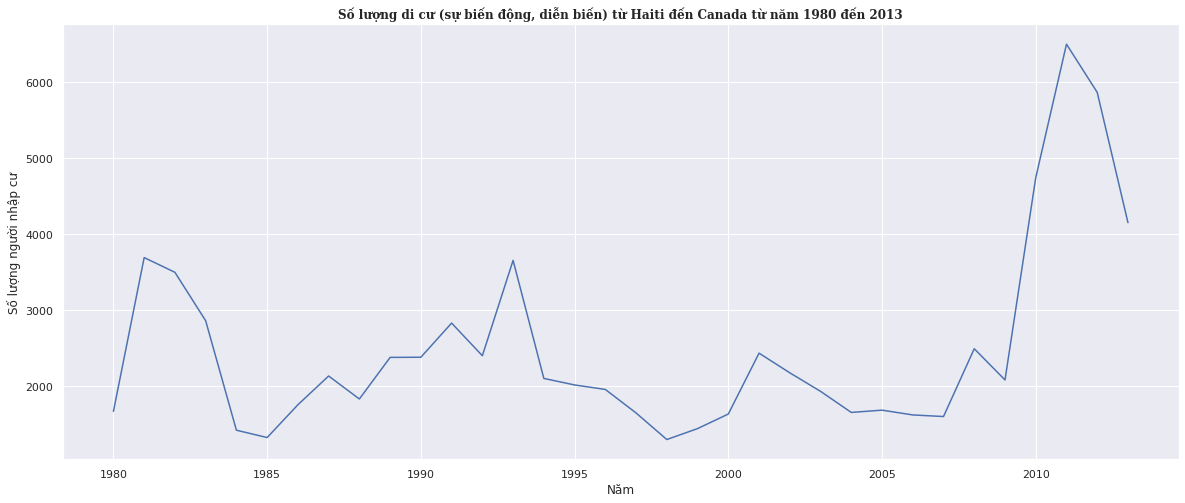

In [86]:
plt.figure(figsize=(20, 8))
haiti_to_canada.plot.line()
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Số lượng di cư (sự biến động, diễn biến) từ Haiti đến Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

### Từ **Japan** đến **Canada**

In [87]:
japan_to_canada = get_by_country('Japan')

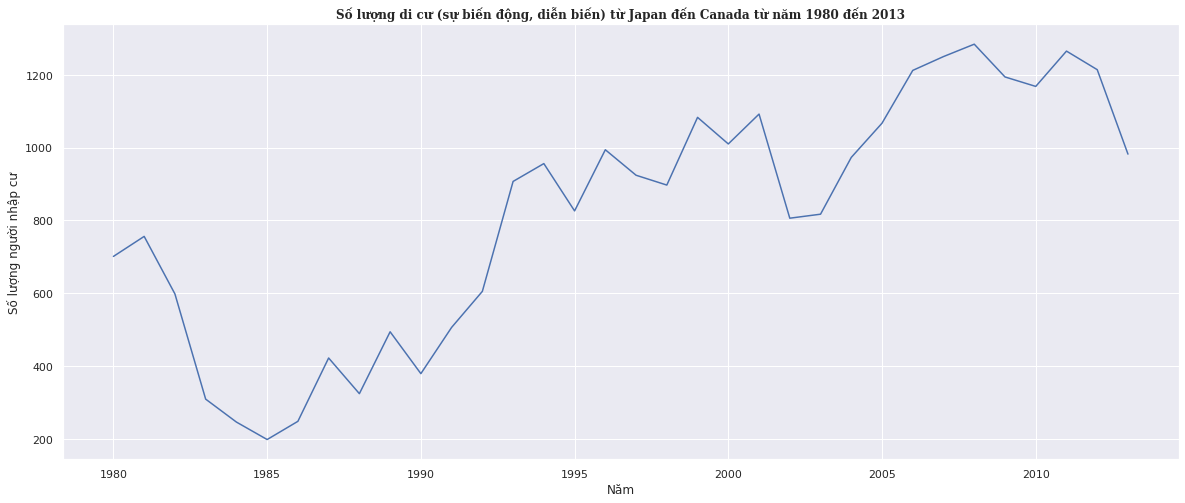

In [88]:
plt.figure(figsize=(20, 8))
japan_to_canada.plot.line()
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Số lượng di cư (sự biến động, diễn biến) từ Japan đến Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

## Câu 7: Tạo Plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013.

__Tỉ lệ nhập cư là cao nhất là:__
* __Tổng nhập cư của từng quốc gia trên tổng nhập cư vào Canada cao nhất.__
* __Tổng nhập cư của từng quốc gia cao nhất.__

In [89]:
df_top5_total = df.sort_values('Total', ascending=False).head(5)

In [90]:
df_top5_total

,Continent,Region,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,11522.0,10343.0,12041.0,13734.0,13673.0,21496.0,18620.0,18489.0,23859.0,22268.0,17241.0,18974.0,28572.0,31223.0,31889.0,27155.0,28235.0,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,2758.0,4323.0,8076.0,14255.0,10846.0,9817.0,13128.0,14398.0,19415.0,20475.0,21049.0,30069.0,35529.0,36434.0,31961.0,36439.0,36619.0,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,27359.0,23795.0,31668.0,23380.0,34123.0,33720.0,39231.0,30145.0,29322.0,22965.0,10367.0,7045.0,8840.0,11728.0,8046.0,6797.0,7533.0,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Unknown,World,World,World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,17304.0,22279.0,27118.0,28397.0,25293.0,33100.0,34589.0,30717.0,25152.0,25986.0,23151.0,13468.0,10132.0,10743.0,7993.0,5938.0,4052.0,3739.0,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,8639.0,11865.0,12509.0,12718.0,13670.0,20479.0,19532.0,15864.0,13692.0,11549.0,8735.0,9734.0,10763.0,13836.0,11707.0,12758.0,14004.0,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0


In [91]:
country_names = [df_top5_total.index][0]

__Plot:__

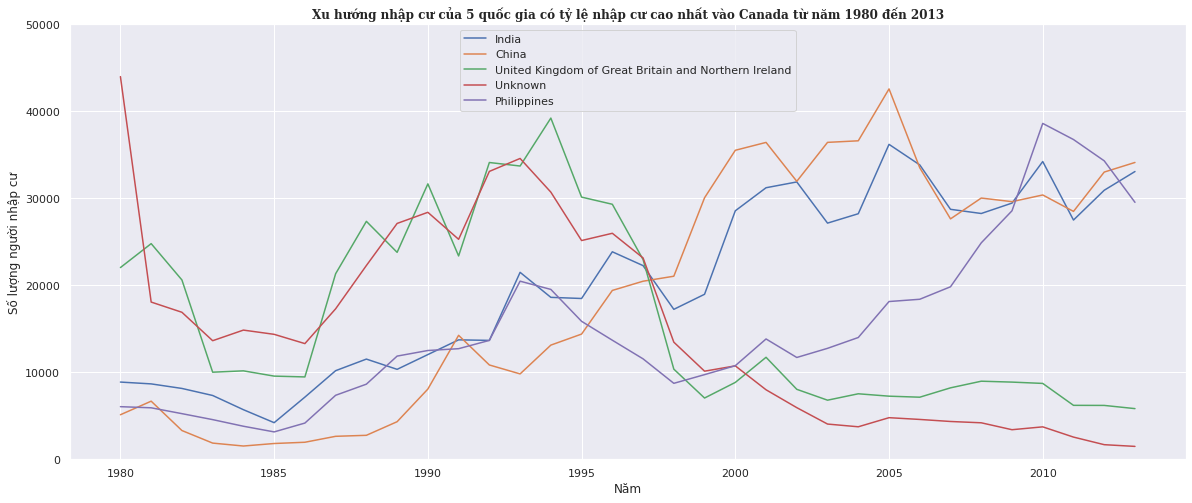

In [92]:
plt.figure(figsize=(20, 8))
for country_name in country_names:
    countryX_to_canada = get_by_country(country_name)
    countryX_to_canada.plot.line()
    plt.legend()

plt.ylim(0, 50000)
#plt.xlim(1950, 2020)
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Xu hướng nhập cư của 5 quốc gia có tỷ lệ nhập cư cao nhất vào Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

## Câu 8: Tạo plot mô tả xu hướng nhập cư của năm quốc gia có tỷ lệ nhập cư thấp nhất vào Canada từ năm 1980 đến 2013.

In [93]:
df_top5_desc_total = df.sort_values('Total', ascending=True).head(5)

In [94]:
df_top5_desc_total

,Continent,Region,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Western Sahara,Africa,Northern Africa,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Marshall Islands,Oceania,Micronesia,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
San Marino,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
New Caledonia,Oceania,Melanesia,Developing regions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0


In [95]:
country_names_desc = [df_top5_desc_total.index][0]

__Plot:__

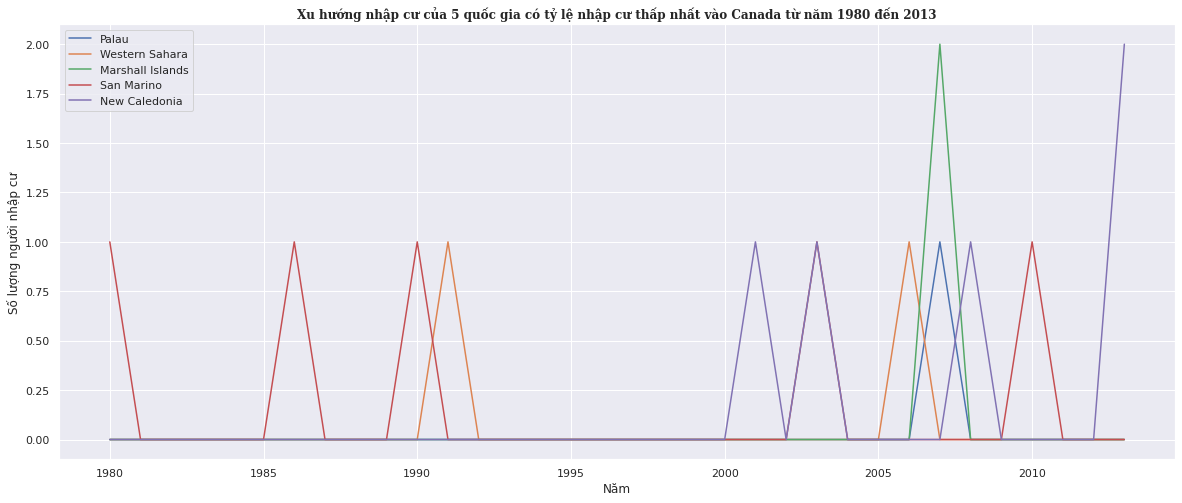

In [96]:
plt.figure(figsize=(20, 8))
for country_name in country_names_desc:
    countryX_to_canada = get_by_country(country_name)
    countryX_to_canada.plot.line()
    plt.legend()

#plt.ylim(0, 50000)
#plt.xlim(1950, 2020)
plt.xlabel('Năm')
plt.ylabel('Số lượng người nhập cư')
plt.title('Xu hướng nhập cư của 5 quốc gia có tỷ lệ nhập cư thấp nhất vào Canada từ năm 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show()

## Câu 9: Tạo các Plot thể hiện tần suất di cư của các nước đến Canada cho từng năm 2010, 2011, 2012 và 2013. Nhận xét gì tần suất di cư đến Canada của các năm đó

In [97]:
world_to_canada_by_year = df.iloc[:,3:-1].sum(axis=0)

In [98]:
world_to_canada_by_year

1980.0    143137.0
1981.0    128641.0
1982.0    121175.0
1983.0    89185.0 
1984.0    88272.0 
1985.0    84346.0 
1986.0    99351.0 
1987.0    152075.0
1988.0    161585.0
1989.0    191550.0
1990.0    216451.0
1991.0    232802.0
1992.0    254787.0
1993.0    256638.0
1994.0    224382.0
1995.0    212864.0
1996.0    226071.0
1997.0    216036.0
1998.0    174195.0
1999.0    189950.0
2000.0    227455.0
2001.0    250636.0
2002.0    229049.0
2003.0    221349.0
2004.0    235822.0
2005.0    262242.0
2006.0    251640.0
2007.0    236753.0
2008.0    247244.0
2009.0    252170.0
2010.0    280687.0
2011.0    248748.0
2012.0    257903.0
2013.0    259021.0
dtype: float64

In [99]:
world_to_canada_from_2010_to_2013 = world_to_canada_by_year[-4:]

In [100]:
world_to_canada_from_2010_to_2013

2010.0    280687.0
2011.0    248748.0
2012.0    257903.0
2013.0    259021.0
dtype: float64

__Plot:__

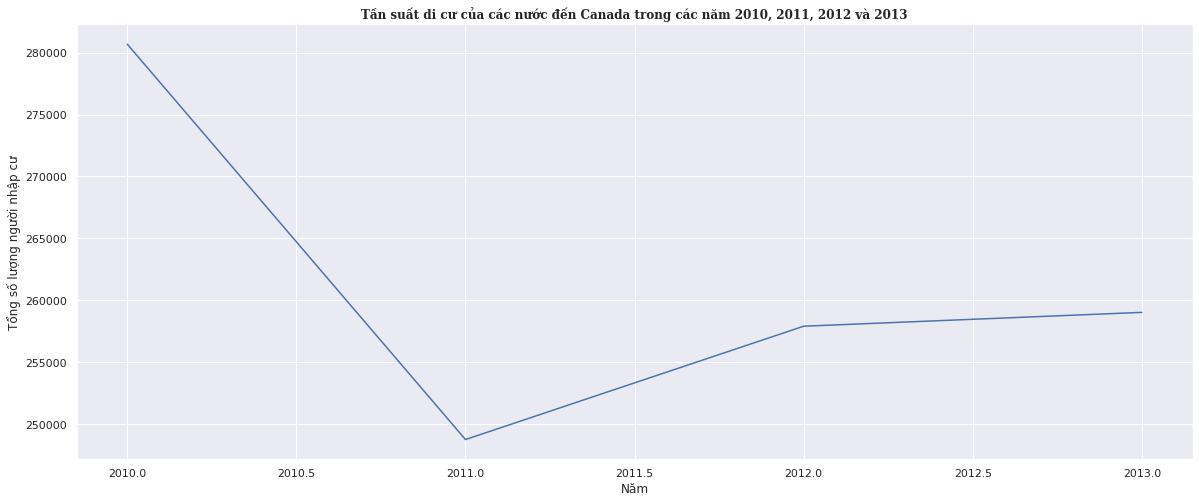

In [101]:
plt.figure(figsize=(20, 8))
world_to_canada_from_2010_to_2013.plot.line()
plt.title('Tần suất di cư của các nước đến Canada trong các năm 2010, 2011, 2012 và 2013', fontweight='bold', fontfamily='serif')
plt.xlabel('Năm')
plt.ylabel('Tổng số lượng người nhập cư')
clear_output()
plt.show()

**Nhận xét**:
- Số lượng người di cư từ các nước khác vào Canada trong 4 năm `2010, 2011, 2012, 2013`, trong đó năm `2010` cao nhất với `280,687` người và năm `2011` là thấp nhất với `248,748` người.
- Nhìn chung số lượng người di cư từ các nước khác vào Canada trong 4 năm `2010, 2011, 2012, 2013` có xu hướng giảm dần.
- Trong giai đoạn `2010 - 2011` số lượng người từ các nước di cư vào Canada giảm mạnh xấp xỉ `11%` (`280,687` người xuống còn `248,748` người).
- Trong giai đoạn `2011-2012` số lượng người từ các nước di cư vào Canada tăng nhẹ xấp xỉ `3%` (`248,748` người xuống còn `257,903` người).
- Trong giai đoạn `2012-2013` số lượng người từ các nước di cư vào Canada tiếp tục tăng nhẹ với xấp xỉ `0.04%` (`257,903` người xuống còn `259,021` người).
<hr>
Tóm lại, vào năm $2010$ với ảnh hưởng của <strong>thế vận hội Vancouver  được tổ chức tại Canada</strong> là 1 sự kiện lớn làm cho dân nhập cư vào Canada giảm sút mạnh, và các năm sau đó có tăng nhẹ, tuy nhiên không đáng kể.

## Câu 10: Tạo các Plot thể hiện tỉ lệ nhập cư của mỗi lục địa vào Canada từ năm 1980 đến 2013.

In [102]:
df_by_continent = df.groupby('Continent', axis=0).sum()

In [103]:
df_by_continent

,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951.0,4363.0,3819.0,2671.0,2639.0,2650.0,3782.0,7494.0,7552.0,9894.0,11012.0,14228.0,19242.0,16531.0,13072.0,14806.0,15700.0,14471.0,13791.0,15996.0,20346.0,24292.0,22710.0,23366.0,28192.0,27523.0,29188.0,28284.0,29890.0,34534.0,40892.0,35441.0,38083.0,38543.0,618948.0
Asia,31025.0,34314.0,30214.0,24696.0,27274.0,23850.0,28739.0,43203.0,47454.0,60256.0,72829.0,89964.0,90752.0,98737.0,88852.0,90424.0,103030.0,106383.0,90929.0,106844.0,134544.0,148083.0,137653.0,131769.0,134850.0,159253.0,149054.0,133459.0,139894.0,141434.0,163845.0,146894.0,152218.0,155075.0,3317794.0
Europe,39760.0,44802.0,42720.0,24638.0,22287.0,20844.0,24370.0,46698.0,54726.0,60893.0,68301.0,57938.0,64123.0,62937.0,62531.0,55764.0,55642.0,48841.0,36719.0,35639.0,38215.0,42779.0,36798.0,34556.0,38082.0,35955.0,33053.0,33495.0,34692.0,35078.0,33425.0,26778.0,29177.0,28691.0,1410947.0
Latin America and the Caribbean,13081.0,15215.0,16769.0,15427.0,13678.0,15171.0,21179.0,28471.0,21924.0,25060.0,27942.0,36827.0,37853.0,33840.0,21341.0,20262.0,18645.0,17174.0,13830.0,15088.0,16898.0,20067.0,19317.0,20263.0,22181.0,24747.0,24676.0,26011.0,26547.0,26867.0,28818.0,27856.0,27173.0,24950.0,765148.0
Northern America,9378.0,10030.0,9074.0,7100.0,6661.0,6543.0,7074.0,7705.0,6469.0,6790.0,5895.0,6057.0,6846.0,7438.0,5902.0,4891.0,5516.0,4753.0,4437.0,5196.0,5433.0,5604.0,4948.0,5543.0,6990.0,8394.0,9613.0,9463.0,10190.0,8995.0,8142.0,7677.0,7892.0,8503.0,241142.0
Oceania,1942.0,1839.0,1675.0,1018.0,878.0,920.0,904.0,1200.0,1181.0,1539.0,2075.0,2495.0,2871.0,2566.0,1967.0,1565.0,1552.0,1263.0,1021.0,1055.0,1276.0,1818.0,1685.0,1800.0,1788.0,1585.0,1473.0,1693.0,1834.0,1860.0,1834.0,1548.0,1679.0,1775.0,55174.0
World,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,17304.0,22279.0,27118.0,28397.0,25293.0,33100.0,34589.0,30717.0,25152.0,25986.0,23151.0,13468.0,10132.0,10743.0,7993.0,5938.0,4052.0,3739.0,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0


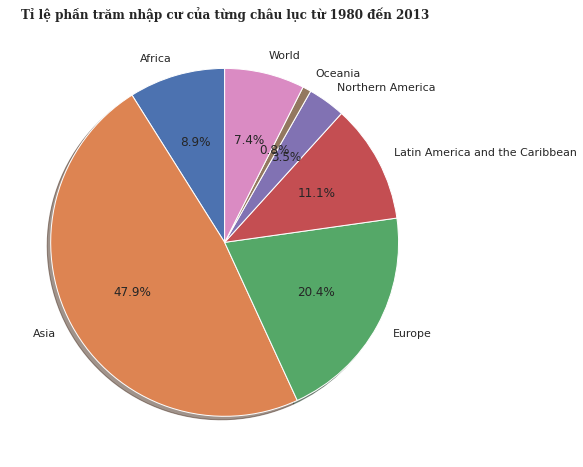

In [104]:
plt.figure(figsize=(20, 8))
plt.pie(df_by_continent['Total'], autopct='%1.1f%%',
        labels=df_by_continent.index,
        startangle=90, shadow=True)
plt.title('Tỉ lệ phần trăm nhập cư của từng châu lục từ 1980 đến 2013', fontweight='bold', fontfamily='serif')
clear_output()
plt.show();

## Câu 11: Tạo các **Conncetion Map** thể hiện quá trình nhập cư của các lục địa đến Canada cho các năm 2010, 2011, 2012 và 2013.

In [105]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import folium

In [107]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json

In [109]:
df_can = pd.read_excel(url, sheet_name='Canada by Citizenship (2)')
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can['Total'] = df_can.sum(axis=1)
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (196, 39)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [110]:
world_geo = r'world_countries.json' 
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain')

folium.Choropleth(geo_data=world_geo, data=df_can,
                  columns=['Country', 'Total'],
                  key_on='feature.properties.name',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Nhập cư vào Canada').add_to(world_map)

In [111]:
world_map